D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Top job recommendations based on input skills:
1. Thermal Engineer (Similarity score: 0.65)
2. Field Engineer (Similarity score: 0.65)
3. Maintenance Engineer (Similarity score: 0.65)
4. Photonics Engineer (Similarity score: 0.65)
5. Pipeline Engineer (Similarity score: 0.65)


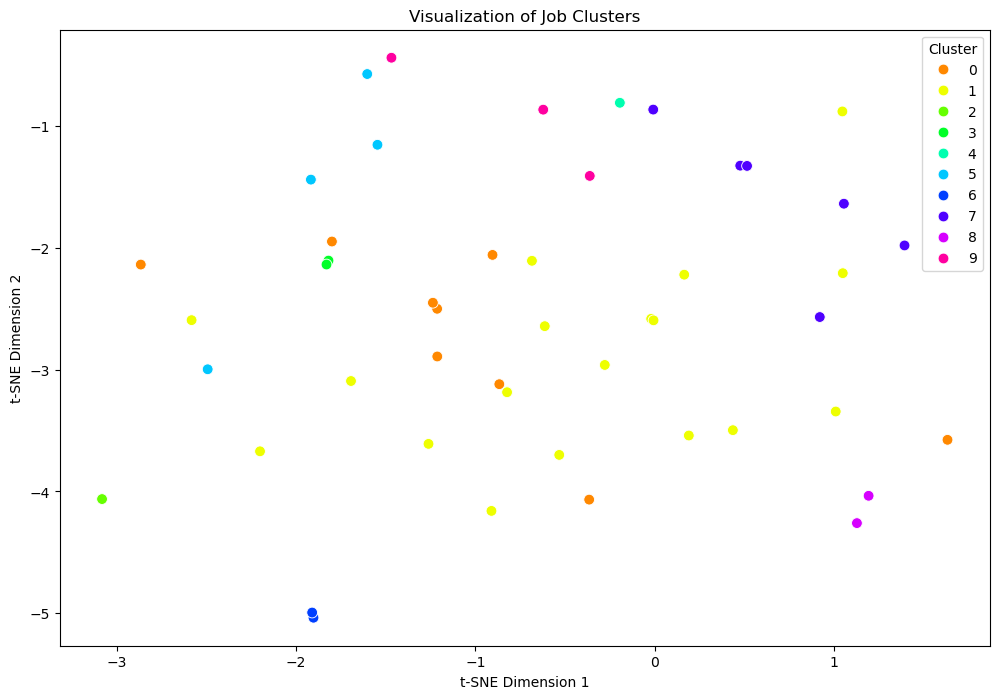


Cluster Labels:
Cluster 0 represents: Thermal Engineering
Cluster 1 represents: Energy Engineering
Cluster 2 represents: Hydraulics Engineering
Cluster 3 represents: Photonics Engineering
Cluster 4 represents: Pipeline Engineering
Cluster 5 represents: Data Analysis
Cluster 6 represents: Mechanical Design
Cluster 7 represents: Control Systems
Cluster 8 represents: Project Management
Cluster 9 represents: Technical Support


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# Load the CSV file
df = pd.read_csv("engineering_skills_matrix.csv")

# Select only numeric columns for clustering (e.g., skill indicators)
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

# Define the number of clusters based on experimentation or domain knowledge
num_clusters = 10  # Adjust based on the dataset size
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_numeric)

# Define labels for each cluster (replace these with meaningful names based on your dataset)
cluster_labels = {
    0: "Thermal Engineering",
    1: "Energy Engineering",
    2: "Hydraulics Engineering",
    3: "Photonics Engineering",
    4: "Pipeline Engineering",
    5: "Data Analysis",
    6: "Mechanical Design",
    7: "Control Systems",
    8: "Project Management",
    9: "Technical Support"
}

# Function to recommend jobs based on input skills
def recommend_jobs(input_skills):
    # Create a binary vector for input skills matching the columns of the numeric DataFrame
    input_vector = [1 if skill in input_skills else 0 for skill in df_numeric.columns]
    
    # Compute similarity scores between the input vector and all job rows
    similarity_scores = cosine_similarity([input_vector], df_numeric)[0]
    
    # Get top 5 jobs with the highest similarity score
    top_job_indices = similarity_scores.argsort()[-5:][::-1]
    top_jobs = df.index[top_job_indices]
    
    # Print top jobs
    print("Top job recommendations based on input skills:")
    for i, job in enumerate(top_jobs, 1):
        print(f"{i}. {df.iloc[job]['Job Title']} (Similarity score: {similarity_scores[top_job_indices[i-1]]:.2f})")

# Example input skills
input_skills = ["Data analysis", "Problem-solving", "Project management", "Technical support"]
recommend_jobs(input_skills)

# Dimensionality Reduction for Visualization (PCA and t-SNE)
# Step 1: Apply PCA to reduce dimensionality to 50 components (faster computation for t-SNE)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(df_numeric)

# Step 2: Apply t-SNE to reduce to 2 dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# Add t-SNE results to the DataFrame
df['tsne_1'] = tsne_result[:, 0]
df['tsne_2'] = tsne_result[:, 1]

# Plotting the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="Cluster",
    palette=sns.color_palette("hsv", num_clusters),
    data=df,
    legend="full",
    s=60
)

plt.title("Visualization of Job Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()

# Print cluster labels for interpretation
print("\nCluster Labels:")
for cluster_num, label in cluster_labels.items():
    print(f"Cluster {cluster_num} represents: {label}")


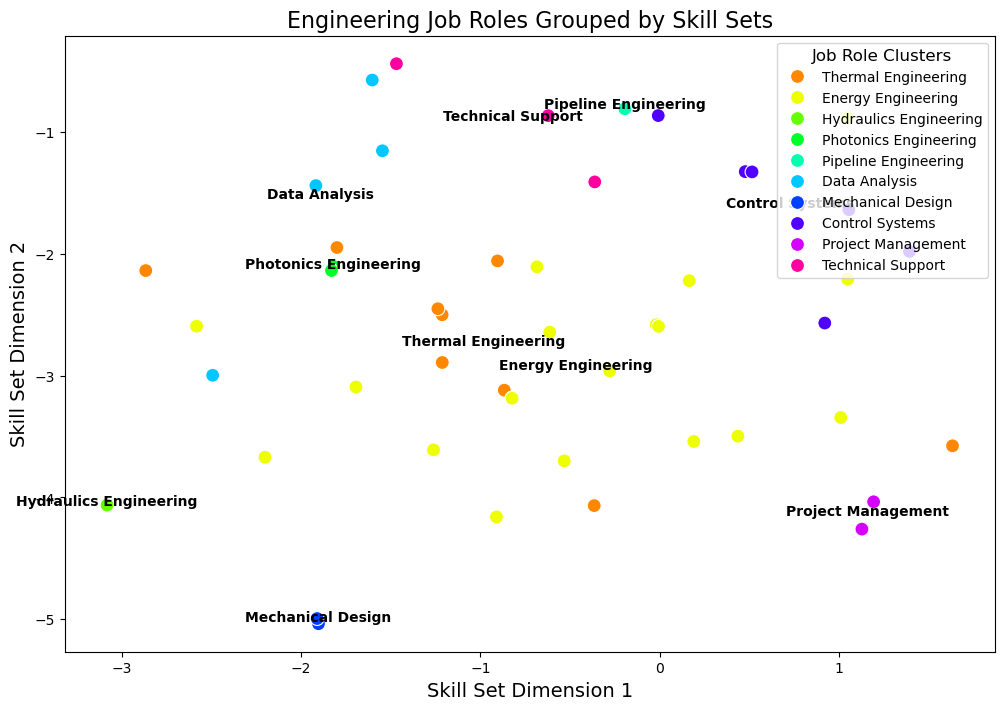

In [29]:
# Plotting the clusters with enhanced readability
plt.figure(figsize=(12, 8))

sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="Cluster",
    palette=sns.color_palette("hsv", num_clusters),
    data=df,
    legend="full",
    s=100  # Larger marker size for visibility
)

# Enhanced title and axis labels for clarity
plt.title("Engineering Job Roles Grouped by Skill Sets", fontsize=16)
plt.xlabel("Skill Set Dimension 1", fontsize=14)
plt.ylabel("Skill Set Dimension 2", fontsize=14)

# Add custom legend with cluster names for better interpretation
handles, _ = plt.gca().get_legend_handles_labels()
labels = [cluster_labels[i] for i in range(num_clusters)]
plt.legend(handles=handles, labels=labels, title="Job Role Clusters", title_fontsize=12, loc='upper right')

# Adding annotations for key clusters (Optional)
for cluster_num, label in cluster_labels.items():
    # Find the average position of points in each cluster for annotation
    avg_x = df[df['Cluster'] == cluster_num]['tsne_1'].mean()
    avg_y = df[df['Cluster'] == cluster_num]['tsne_2'].mean()
    plt.text(avg_x, avg_y, label, fontsize=10, ha='center', fontweight='bold', color='black')

plt.show()
